In [187]:
from statsmodels.tsa import stattools as st
import pandas as pd 
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
from arch.unitroot import ADF 

In [27]:
stock = pd.read_csv("./stocklist/8446_stockinfo.csv",index_col="date")


In [290]:
#close ret per day;單期收益
st_train = stock.close[:1000]
print(st_train[-5:])
st_test = stock.close[998:]
priceret = st_train.diff(2)/st_train
print(st_train.diff(2)[-5:])
priceret = priceret.dropna()
pricetest = st_test.diff(2)/st_test
pricetest = pricetest.dropna()
print(priceret[-5:])
# print(pricetest[:5])
print("==="*8)
print(stock.close[996:1004])
# priceret.plot()
# plt.show()

date
2018-01-08    103.5
2018-01-09    103.0
2018-01-10    104.0
2018-01-11    108.0
2018-01-12    108.0
Name: close, dtype: float64
date
2018-01-08    0.5
2018-01-09    1.0
2018-01-10    0.5
2018-01-11    5.0
2018-01-12    4.0
Name: close, dtype: float64
date
2018-01-08    0.004831
2018-01-09    0.009709
2018-01-10    0.004808
2018-01-11    0.046296
2018-01-12    0.037037
Name: close, dtype: float64
date
2018-01-09    103.0
2018-01-10    104.0
2018-01-11    108.0
2018-01-12    108.0
2018-01-15    110.0
2018-01-16    110.0
2018-01-17    109.0
2018-01-18    107.0
Name: close, dtype: float64


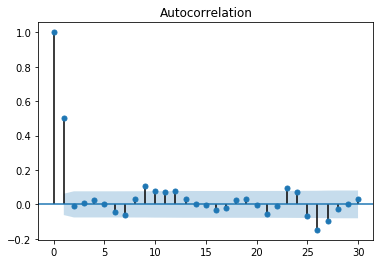

In [306]:
#calculate acf 自相關係數
# acfs = st.acf(priceret,nlags=40)
# print(acfs.getfield)

print("==="*6)

plot_acf(priceret,lags=30)


[ 1.          0.50064138 -0.34954435  0.28852953 -0.2186469   0.17380915
 -0.21940365  0.14910733 -0.02914415  0.11859939 -0.04327881  0.12991713
 -0.06395492  0.04544847 -0.03563042  0.0329908  -0.082308    0.09675339
 -0.06438222  0.09067652 -0.14613047  0.05035763  0.0063901   0.11447708
 -0.09555762 -0.05163269 -0.10182882  0.02871369 -0.04440682  0.08270832
  0.01205547  0.05259176  0.01726987 -0.01454214 -0.0311299  -0.00672182
 -0.03628303  0.01828533 -0.06504333  0.03722015 -0.01617914]


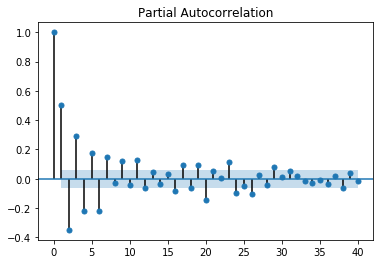

In [135]:
#calculate pacf;偏自相關係數
pacfs = st.pacf(priceret)
print(pacfs)
print("==="*8)
plot_pacf(priceret,use_vlines=True,lags=40)



In [136]:
#ADF 單跟檢定 
adf_priceret = ADF(priceret)
print(adf_priceret.critical_values)
print(adf_priceret.stat)
print(adf_priceret.summary())
#因為-32.661 < 1%顯著水準(-3.43) 拒絕非定態的虛無假設,判斷此序列為定態。

{'10%': -2.5683508010519396, '5%': -2.8645089073679597, '1%': -3.43707471791689}
-5.5995366961258926
   Augmented Dickey-Fuller Results   
Test Statistic                 -5.600
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [137]:
#白雜訊檢定 --Ljung-Box(LB)檢定
print(st.q_stat(acfs[1:13],len(priceret))[1][-1])
st.q_stat(pacfs[1:13],len(priceret))

# 1.07e-74 <<0.05 存在自相關性

2.4968734649959624e-54


(array([250.89318567, 373.31978556, 456.82008089, 504.81892759,
        535.18065965, 583.60978033, 605.99981919, 606.85606445,
        621.04988007, 622.94189388, 640.00846274, 644.14847374]),
 array([1.65851160e-056, 8.60277519e-082, 1.08527567e-098, 6.07834747e-108,
        2.02767319e-113, 7.99609840e-123, 1.24287512e-126, 7.85591382e-126,
        6.34354918e-128, 2.13275321e-127, 3.84063587e-130, 3.91118554e-130]))

In [151]:
from statsmodels.tsa import arima_model as arima
model1 = arima.ARIMA(priceret,order=(1,0,1)).fit()
model2 = arima.ARIMA(priceret,order=(1,0,2)).fit()
model3 = arima.ARIMA(priceret,order=(2,0,1)).fit()
model4 = arima.ARIMA(priceret,order=(2,0,2)).fit()

print(model1.aic,model2.aic,model3.aic,model4.aic)

/Users/ray/.pyenv/versions/3.5.1/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/ray/.pyenv/versions/3.5.1/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/ray/.pyenv/versions/3.5.1/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/ray/.pyenv/versions/3.5.1/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has

-4187.905681065083 -4185.0223190356755 -4189.316111984239 -4188.710526696992


In [184]:
model2.conf_int()


,0,1
const,-0.002786,-0.000308
ar.L1.close,0.982359,1.002844
ma.L1.close,-0.061510,-0.029801
ma.L2.close,-0.970103,-0.938585


In [185]:
import math

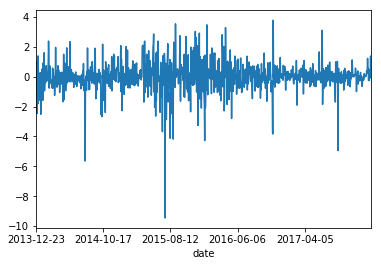

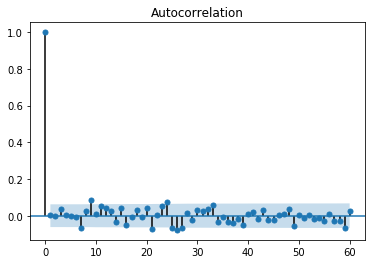

0.08499201973891796

In [230]:
stdresid = model3.resid/math.sqrt(model3.sigma2)
# print(stdresid)
stdresid.plot.line()
plot_acf(stdresid,lags=60)
plt.show()

Lj = st.q_stat(st.acf(stdresid)[1:13],len(stdresid))
Lj[1][-1]


In [293]:
#forecast 5 step

i = 0
while i < 5: 
    date = pricetest.index[i]
    date_position = stock.close.index.get_loc(date)
    print(pricetest.index[i],pricetest[i],model3.forecast(5)[0][i])
    testdata = stock.close[date_position-2]/(1-pricetest[i]) #還原股價
    forecastdata = stock.close[date_position-2]/(1-model3.forecast(5)[0][i]) #還原預測股價
    print(stock.close[date],testdata,forecastdata)
    i +=1 
    print("===")
    

2018-01-15 0.01818181818181818 -0.004568158681216653
110.0 110.0 107.50888236571316
===
2018-01-16 0.01818181818181818 -0.004522011419129529
110.0 110.0 107.51382127249154
===
2018-01-17 -0.009174311926605505 -0.002001311563635965
109.0 109.0 109.78029542530597
===
2018-01-18 -0.028037383177570093 -0.0018481618402038694
107.0 107.00000000000001 109.79707723169446
===
2018-01-19 -0.02830188679245283 -0.0019912338793645276
106.0 105.99999999999999 108.78338683462287
===


In [304]:
#check ARCH effect 
from arch import arch_model 

am = arch_model(priceret)
model = am.fit(update_freq=0)

# print(am)
am.fit()
print("===")
print(model.summary())





Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1948.2307443830477
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: -1947.360065219473
Iteration:      2,   Func. Count:     19,   Neg. LLF: -1948.230739760705
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1948.2307443830477
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 2
===
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                1948.23
Distribution:                  Normal   AIC:                          -3888.46
Method:          

/Users/ray/.pyenv/versions/3.5.1/lib/python3.5/site-packages/arch/univariate/base.py:571: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/ray/.pyenv/versions/3.5.1/lib/python3.5/site-packages/arch/univariate/base.py:571: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
